In [1]:
import numpy as np
import scipy.optimize

In [2]:
weights = np.load('/scratch/src/reviewer-assignment/mk/mk.npy')
affinity = weights.transpose()

n_rev = np.size(weights, axis=0)
n_pap = np.size(weights, axis=1)

a = weights.flatten()
b = weights.flatten()

In [3]:
Np = np.zeros((n_pap, n_pap*n_rev))
Nr = np.zeros((n_rev, n_pap*n_rev))

In [4]:
for pdx,p in enumerate(affinity):
    for rdx,val in enumerate(p):
        Np[pdx][rdx*n_pap + pdx] = val
        
for rdx,r in enumerate(weights):
    for pdx,val in enumerate(r):
        Nr[rdx][rdx*n_pap + pdx] = val

In [5]:
I = np.identity(n_pap*n_rev)
K = np.vstack((Nr, Np, I, -I))

In [6]:
cr = 20*np.ones(n_rev)
cp = 4*np.ones(n_pap)
zeroes = np.zeros(b.shape[0])
ones = np.ones(b.shape[0])
d = np.concatenate((cp, cr, ones, zeroes))

In [7]:
res = scipy.optimize.linprog(a, A_ub=K, b_ub=d)

In [8]:
Np.sum(axis=1)

array([ 1.1, 11. , 18.5, 15. , 13.3, 19.1, 13.8, 14.8, 14.5, 12.5, 15. ,
        4. , 17.9, 19.2,  2.1, 14.2,  1.1,  1.5, 15.2, 11.3, 10. ,  3.1,
       14.5, 16. , 14.5, 15.6, 10.5,  6.1,  2.5, 15. ,  6.4, 13.3,  1.1,
       11.9, 10.7, 16.2,  9.3, 14.8, 18.9, 17.4, 15. , 10. , 18.6, 11.4,
       16. , 18.9, 14.8, 18.7,  3.1,  3.1, 11.3, 15.7, 12.3, 11.9,  2.1,
       14.7,  3.2, 19.8,  6.8, 15.6,  6.7, 18.9,  3.1,  3.7,  4.3, 13.3,
        5.9,  3. ,  8.5, 14.6,  8.9,  8.9, 16.8, 13.3, 14. ,  1.1, 15. ,
       18.9,  3.1,  8.4,  1.1, 14.5, 13.9, 14.7, 14.2, 15. ,  3.7, 14.8,
       13.3, 15. , 14.5, 16.4,  8.3, 14.5, 16. , 14.6, 14.5, 13. , 15. ,
       11.3,  5.7, 14.5, 12.1,  2.1, 14.8, 14.8, 16. , 10.7,  6. , 14.5,
        3.7, 13.3, 14.5, 15.8, 10.7, 12.8, 18.9,  2.1, 16. , 19.1, 11.3,
       13.1,  5.9, 15. , 14.8,  3.2, 14.8, 11.9,  1.1, 11.7, 14.9,  6.1,
        2.1])

In [9]:
affinity.shape, weights.shape

((133, 47), (47, 133))

In [10]:
N = np.vstack((Nr, Np))
Nz = np.zeros((n_rev+n_pap, n_pap*n_rev))
nonzero = np.nonzero(N)
nonzero_row = nonzero[0]
nonzero_col = nonzero[1]
for row, col in zip(nonzero_row, nonzero_col):
    Nz[row][col] = 1
    
np.max(Nz.sum(axis=0)), Nz[0]

(2.0, array([0., 0., 1., ..., 0., 0., 0.]))

In [11]:
Npz = np.zeros((n_pap, n_pap*n_rev))
nonzero = np.nonzero(Np)
nonzero_row = nonzero[0]
nonzero_col = nonzero[1]
for row, col in zip(nonzero_row, nonzero_col):
    Npz[row][col] = 1
    
np.max(Npz.sum(axis=0)), np.count_nonzero(Npz.sum(axis=0))

(1.0, 3858)

In [12]:
Nrz = np.zeros((n_rev, n_pap*n_rev))
nonzero = np.nonzero(Nr)
nonzero_row = nonzero[0]
nonzero_col = nonzero[1]
for row, col in zip(nonzero_row, nonzero_col):
    Nrz[row][col] = 1
    
np.max(Nrz.sum(axis=0)), np.count_nonzero(Nrz.sum(axis=0))

(1.0, 3858)

In [13]:
Nrz.sum(axis=1), weights[8]

(array([ 57.,  98., 124.,  91., 123., 132., 121.,  31.,   3., 103.,  81.,
         80., 102.,  77., 107., 101.,  98., 112.,  97.,  36.,  58.,  90.,
         91.,  64.,  95.,  23.,  27., 105., 110.,  55.,  73.,  96.,  93.,
         81.,  29.,  65.,  35.,  64.,  91.,  43.,  72., 102.,  64.,  93.,
        107., 126., 132.]),
 array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0

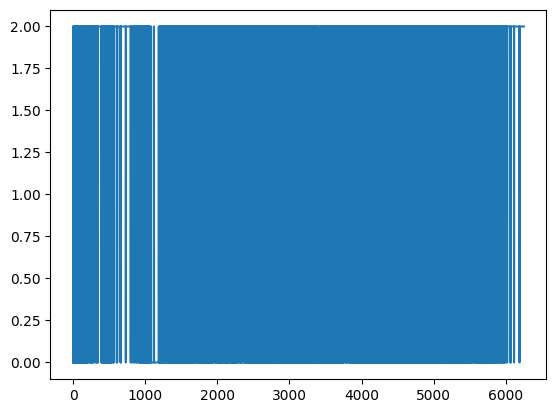

In [14]:
import matplotlib.pyplot as plt
plt.plot(Nz.sum(axis=0))

In [19]:
(Np @ b).shape, cp.shape

((133,), (133,))

In [26]:
Nr @ b

array([ 3.55, 13.65, 20.14, 17.63, 19.22, 18.83, 23.29,  8.21,  0.54,
       16.19, 20.  , 13.67,  8.72, 15.34, 19.56, 22.64, 15.44, 24.37,
       18.65, 10.79, 12.69, 23.19, 18.81, 17.4 , 17.75,  5.84,  1.33,
       22.54, 12.09, 10.59, 15.45, 15.5 , 18.08, 11.75,  0.64,  5.45,
        1.38, 14.92, 17.15,  6.3 , 23.08, 20.95, 11.44, 18.74, 24.16,
       14.81, 22.26])

In [24]:
Np @ b / cp

array([0.0875, 1.255 , 2.4125, 1.75  , 1.5175, 2.5025, 1.48  , 1.61  ,
       1.8125, 1.4975, 1.75  , 0.4   , 2.1875, 2.45  , 0.1725, 1.56  ,
       0.0875, 0.1025, 1.87  , 1.2775, 1.015 , 0.2875, 1.5875, 1.745 ,
       1.5875, 1.705 , 1.2325, 0.5625, 0.2325, 1.75  , 0.62  , 1.5175,
       0.0875, 1.3275, 1.2425, 1.95  , 1.1075, 1.61  , 2.3925, 2.305 ,
       1.75  , 1.015 , 2.37  , 1.235 , 1.745 , 2.3925, 1.61  , 2.4625,
       0.2875, 0.2875, 1.1925, 1.7225, 1.3925, 1.3275, 0.1675, 1.7975,
       0.28  , 2.52  , 0.525 , 1.72  , 0.6475, 2.3925, 0.2875, 0.3475,
       0.3825, 1.5175, 0.4425, 0.285 , 0.9675, 1.6   , 1.0325, 1.0125,
       2.2   , 1.5175, 1.53  , 0.0875, 1.75  , 2.3925, 0.2875, 0.855 ,
       0.0875, 1.7075, 1.4975, 1.7275, 1.71  , 1.75  , 0.3475, 1.61  ,
       1.5175, 1.75  , 1.5875, 2.08  , 0.9675, 1.5875, 1.745 , 1.6   ,
       1.6875, 1.575 , 1.75  , 1.3925, 0.5975, 1.5875, 1.4525, 0.1675,
       1.61  , 1.61  , 1.745 , 1.2425, 0.575 , 1.6875, 0.3475, 1.5175,
      